In [2]:
!pip install stable-baselines3[extra]

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616822 sha256=f66eec9fa91c50d819003eaae796a10af6d1b5041c29ae5ee3d33b6906c67db9
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\b3\50\6c\0a82c1358b4da2dbd9c1bb17e0f89467db32812ab236dbf6d5
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=446447 sha256=1b0589b92353e1759792322a2463734feee070387fe98456c2a5558154a1e740
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\2b\03\e4\8b662e95b85786a03898fca125d5a9e3fe49337b1eba8fddd2
Successfully built gym AutoROM.accept-rom-license
  Attempting uninstall: importlib-metadata
 

In [ ]:
import gym 
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
# to evaluate the model how well its performing
from stable_baselines3.common.evaluation import evaluate_policy
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

In [4]:
#mapping to openAI gym environment
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

In [5]:
environment_name

'CartPole-v0'

In [72]:
env.reset()

array([[-0.03432051,  0.04314561, -0.02676157, -0.01058159]],
      dtype=float32)

In [77]:
env.action_space.sample()

0

In [14]:
episodes = 5
for episode in range(1, episodes+1):
    # observation passed to Reinforcement Learning agent to determine whats the best action to be done for max reward.
    state = env.reset()  
    # episode done or not
    done = False  
    # running score within th eepisode
    score = 0     
    
    while not done:
        # view the graphical representation of the environment
        env.render()  
        # generate random sample there are two action space i)action-discrete of two actions(0 or 1)=actions that can be taken on that env and
        # ii)observation space = observation look in the environment
        action = env.action_space.sample()
        # unpack the step returned as state, reward, done, info
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))


Episode:1 Score:25.0
Episode:2 Score:14.0
Episode:3 Score:38.0
Episode:4 Score:15.0
Episode:5 Score:30.0


In [15]:
env.close()

In [16]:
env.action_space
# 0 Push cart to the left and 1 Push cart to the right

Discrete(2)

In [19]:
env.action_space.sample()

0

In [20]:
env.observation_space
# cart position,cart velocity, pole angle, pole angular velocity

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

RL algorithms are of tow types:
i) Model Free RL(Policy Optimization and Qlearning) -- use the current state and predict 
ii) Model Based RL(learn the model and given the model) -- predict the future state inorder to generate a best possible action

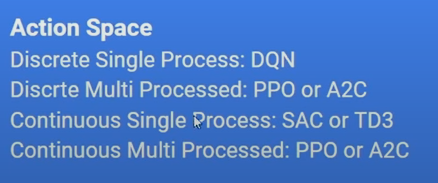
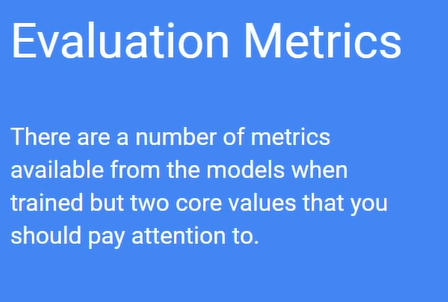
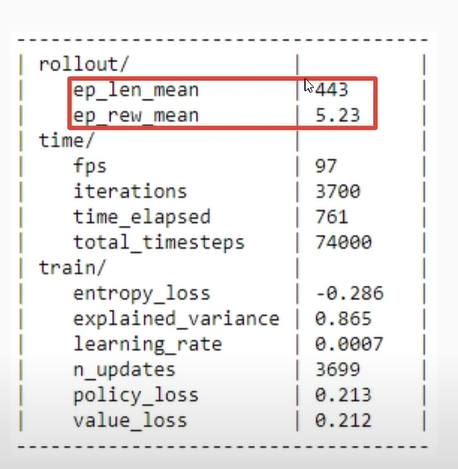
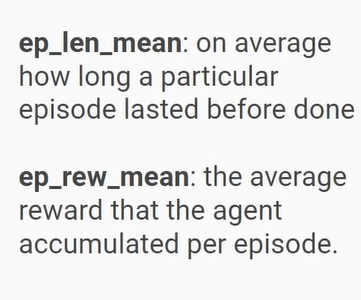
average rewards

## 3.Train a RL Model

In [21]:
log_path = os.path.join('Training', 'Logs')

In [22]:
log_path

'Training\\Logs'

In [24]:
#Initaiting Environment 
env = gym.make(environment_name)
# wrap the enviroment usin DummyVecEnv
env = DummyVecEnv([lambda: env])
# PPO algorithm doesnt have training metrics so we should use tensorboard_log for measuring the test metrics
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [25]:
# Documentation about PPO
PPO??

In [26]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_1
-----------------------------
| time/              |      |
|    fps             | 278  |
|    iterations      | 1    |
|    time_elapsed    | 7    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 419          |
|    iterations           | 2            |
|    time_elapsed         | 9            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0086298445 |
|    clip_fraction        | 0.108        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.00461      |
|    learning_rate        | 0.0003       |
|    loss                 | 8.13         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0169      |
|    value_loss           | 53.7         |
----------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 754         |
|    iterations           | 13          |
|    time_elapsed         | 35          |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.007044623 |
|    clip_fraction        | 0.0546      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.537      |
|    explained_variance   | 0.457       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.07        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00435    |
|    value_loss           | 6.11        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 765         |
|    iterations           | 14          |
|    time_elapsed         | 37          |
|    total_timesteps      | 28672 

------------------------------------------
| time/                   |              |
|    fps                  | 813          |
|    iterations           | 24           |
|    time_elapsed         | 60           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0045900643 |
|    clip_fraction        | 0.0451       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.458       |
|    explained_variance   | 0.212        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0306       |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00302     |
|    value_loss           | 0.0445       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 817         |
|    iterations           | 25          |
|    time_elapsed         | 62          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 856         |
|    iterations           | 35          |
|    time_elapsed         | 83          |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.004327223 |
|    clip_fraction        | 0.0268      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.445      |
|    explained_variance   | -0.000263   |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00583     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.00119    |
|    value_loss           | 0.000808    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 860         |
|    iterations           | 36          |
|    time_elapsed         | 85          |
|    total_timesteps      | 73728 

------------------------------------------
| time/                   |              |
|    fps                  | 895          |
|    iterations           | 46           |
|    time_elapsed         | 105          |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0020000776 |
|    clip_fraction        | 0.0151       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.393       |
|    explained_variance   | -0.00394     |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00692     |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.00269     |
|    value_loss           | 2.88e-05     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 897          |
|    iterations           | 47           |
|    time_elapsed         | 107          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 920          |
|    iterations           | 57           |
|    time_elapsed         | 126          |
|    total_timesteps      | 116736       |
| train/                  |              |
|    approx_kl            | 0.0022517296 |
|    clip_fraction        | 0.0112       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.274       |
|    explained_variance   | -0.278       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00228     |
|    n_updates            | 560          |
|    policy_gradient_loss | 0.000477     |
|    value_loss           | 5.01e-06     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 922          |
|    iterations           | 58           |
|    time_elapsed         | 128          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 938          |
|    iterations           | 68           |
|    time_elapsed         | 148          |
|    total_timesteps      | 139264       |
| train/                  |              |
|    approx_kl            | 0.0032682098 |
|    clip_fraction        | 0.022        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.236       |
|    explained_variance   | -1.14        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00476     |
|    n_updates            | 670          |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 2.03e-06     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 939          |
|    iterations           | 69           |
|    time_elapsed         | 150          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 949         |
|    iterations           | 79          |
|    time_elapsed         | 170         |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.001142344 |
|    clip_fraction        | 0.0269      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.224      |
|    explained_variance   | -0.984      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0115     |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.00152    |
|    value_loss           | 2.21e-06    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 950          |
|    iterations           | 80           |
|    time_elapsed         | 172          |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 960          |
|    iterations           | 90           |
|    time_elapsed         | 191          |
|    total_timesteps      | 184320       |
| train/                  |              |
|    approx_kl            | 0.0042161704 |
|    clip_fraction        | 0.0282       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.246       |
|    explained_variance   | -2.67        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0117       |
|    n_updates            | 890          |
|    policy_gradient_loss | -0.00139     |
|    value_loss           | 3.73e-07     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 960          |
|    iterations           | 91           |
|    time_elapsed         | 194          |
|    total_

## 4. Save and Reload Model

In [27]:
PPO_Path = os.path.join('Training', 'Saved Models', 'PPO_Model_Cartpole')

In [28]:
model.save(PPO_Path)

In [29]:
del model

In [30]:
PPO_Path

'Training\\Saved Models\\PPO_Model_Cartpole'

In [31]:
env

In [32]:
model = PPO.load(PPO_Path, env=env)

In [33]:
model.learn(total_timesteps=10000)

Logging to Training\Logs\PPO_2
-----------------------------
| time/              |      |
|    fps             | 1994 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1242         |
|    iterations           | 2            |
|    time_elapsed         | 3            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0033534311 |
|    clip_fraction        | 0.0213       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.251       |
|    explained_variance   | -1.16        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00301      |
|    n_updates            | 990          |
|    policy_gradient_loss | 0.00151      |
|    value_loss           | 2.41e-07     |
----------------------------

## 5.Evaluation

In [34]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

C:\Users\acer\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(200.0, 0.0)

(200.0, 0.0) = average reward over the number of episodes and standard deviation in that rewards
Cartpole reward:
    Reward for cartpole is calculated as 1 point for every step that the pole reamins upright(with a max of 200 steps).
    If the pole is more than 15 degrees from vertical or the cart moves more than 2.4 units from center the episode ends.

In [42]:
env.close()

## 6.Test Model

In [39]:
action, _ = model.predict(obs)

In [40]:
action

array([1], dtype=int64)

In [41]:
episodes = 5
for episode in range(1, episodes+1):
    # observation passed to Reinforcement Learning agent to determine whats the best action to be done for max reward.
    # rather than taking the random steps actualy model is going to take steps
    obs = env.reset()  
    # episode done or not
    done = False  
    # running score within th eepisode
    score = 0     
    
    while not done:
        # view the graphical representation of the environment
        env.render()  
        # generate random sample there are two action space i)action-discrete of two actions(0 or 1)=actions that can be taken on that env and
        # ii)observation space = observation look in the environment
        #using model here from observation
        action, _ = model.predict(obs)
        # unpack the step returned as state, reward, done, info
        obs, reward, done, info = env.step(action)
        score +=  reward
    print('Episode:{} Score:{}'.format(episode, score))


Episode:1 Score:[200.]
Episode:2 Score:[200.]
Episode:3 Score:[200.]
Episode:4 Score:[200.]
Episode:5 Score:[200.]


In [46]:
obs = env.reset()
obs
## cart position,cart velocity, pole angle, pole angular velocity

array([[-0.03134521,  0.01674771,  0.03480402,  0.03382123]],
      dtype=float32)

In [47]:
action, _ = model.predict(obs)
#it will return the best value to be taken like the action for the agent to perform

In [57]:
env.action_space.sample()

1

In [58]:
env.step(action)
# op: the state after taking the action on it, reward after taking the action

(array([[-0.03101026,  0.21135372,  0.03548044, -0.2476807 ]],
       dtype=float32),
 array([1.], dtype=float32),
 array([False]),
 [{}])

## 7.Viewing Logs in Tensorboard

In [59]:
training_log_path = os.path.join(log_path, 'PPO_2')

In [60]:
!tensorboard --logdir={training_log_path}

^C


Metrics:
1.Average Rewar
2.Average Episode Length

Training for strategies
1.Train for longer
2.Hyperparameter Tuning(obtuna with stable-baseline3)

Applying callbacks:
When the model hot some benchmark the model will stop training especially cases for larger number. It will automatically save the model.

Modify NN architecture:
Define new MLP network

Use Different algortihms

## 8.Adding a callback to the training stage

In [61]:
#EvalCallback = callback runs during training stage
#StopTrainingOnRewardThreshold = checker once the model passes through env
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [62]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')

In [64]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [65]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [66]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_3
-----------------------------
| time/              |      |
|    fps             | 1918 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1269        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009512493 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.00379    |
|    learning_rate        | 0.0003      |
|    loss                 | 6.25        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0217     |
|    value_loss           | 51.3        |
-----------------------------------------
---

In [67]:
model_path = os.path.join('Training', 'Saved Models', 'best_model')
model = PPO.load(model_path, env=env)

In [68]:

evaluate_policy(model, env, n_eval_episodes=10, render=True)

(200.0, 0.0)

In [69]:
env.close()

## 8. Changing Policies

In [70]:
#first NN architecture 
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]
model = PPO('MlpPolicy', env, verbose = 1, policy_kwargs={'net_arch': net_arch})
model.learn(total_timesteps=20000, callback=eval_callback)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1387 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 829         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014053957 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.00223    |
|    learning_rate        | 0.0003      |
|    loss                 | 4.27        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0242     |
|    value_loss           | 21.6        |
-----------------------------------------
-----------------

## 9. Using an Alternate Algorithm 

In [71]:
from stable_baselines3 import DQN
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)
model.learn(total_timesteps=20000, callback=eval_callback)
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')
model.save(dqn_path)
model = DQN.load(dqn_path, env=env)
evaluate_policy(model, env, n_eval_episodes=10, render=True)
env.close()

Using cpu device
Logging to Training\Logs\DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.96     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3426     |
|    time_elapsed     | 0        |
|    total_timesteps  | 84       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.93     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4278     |
|    time_elapsed     | 0        |
|    total_timesteps  | 148      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.857    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 5398     |
|    time_elapsed     | 0        |
|    total_timesteps  | 301      |
----------------------------------
-------

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 6414     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2448     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 6406     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2509     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 6456     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2619     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 7218     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4816     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 7250     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4910     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 7290     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4995     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 7530     |
|    time_elapsed     | 0        |
|    total_timesteps  | 7273     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 7556     |
|    time_elapsed     | 0        |
|    total_timesteps  | 7396     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 7550     |
|    time_elapsed     | 0        |
|    total_timesteps  | 7474     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 7467     |
|    time_elapsed     | 1        |
|    total_timesteps  | 9564     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 7461     |
|    time_elapsed     | 1        |
|    total_timesteps  | 9646     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 7465     |
|    time_elapsed     | 1        |
|    total_timesteps  | 9719     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 7459     |
|    time_elapsed     | 1        |
|    total_timesteps  | 11687    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 7469     |
|    time_elapsed     | 1        |
|    total_timesteps  | 11785    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 7482     |
|    time_elapsed     | 1        |
|    total_timesteps  | 11866    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 640      |
|    fps              | 7536     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13767    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 644      |
|    fps              | 7545     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13837    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 7549     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13928    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 748      |
|    fps              | 7471     |
|    time_elapsed     | 2        |
|    total_timesteps  | 16114    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 752      |
|    fps              | 7466     |
|    time_elapsed     | 2        |
|    total_timesteps  | 16186    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 7464     |
|    time_elapsed     | 2        |
|    total_timesteps  | 16316    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 856      |
|    fps              | 7544     |
|    time_elapsed     | 2        |
|    total_timesteps  | 18683    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 7547     |
|    time_elapsed     | 2        |
|    total_timesteps  | 18804    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 7551     |
|    time_elapsed     | 2        |
|    total_timesteps  | 18891    |
----------------------------------
----------------------------------
| rollout/          